# Final Project: Water Chemistry Data Quality Comparison

### Matt Heinle

There are many sources of water chemistry data available to the public, but how do we decide which datasets are best for our research? In this project, I am comparing the quality of water chemistry data in central New Jersey from the U.S. Geological Survey (USGS) and the Watershed Institute (WSI) based on three criteria:

1) Spatial and temporal range
2) Statistical value
3) Utility

These two sources represent a federal agency with professional scientists who test their samples primarily in a lab, and a private conservation group that depends on trained volunteers for data collection in the field. Both of these data sources have their merits and detractions, so it is important to thoroughly assess the characteristics of each dataset to determine their quality and use cases before undertaking a research project.

## 1. Spatial and Temporal Range

In [1]:
# import necessary packages for visualization
import pandas as pd
import numpy as np
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt

In [2]:
# bring data into pandas dataframes
wsi_sites = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/sites_wsi.csv')
usgs_sites = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/sites_usgs.csv')

wsi_sites source: https://sbmwa.maps.arcgis.com/apps/dashboards/3cec936ab27e4b25b3fa72f00ee36d44

usgs_sites source: https://waterdata.usgs.gov/nj/nwis/inventory?search_criteria=county_cd&search_criteria=site_tp_cd&submitted_form=introduction

In [3]:
wsi_sites

,Site,Latitude,Longitude,Start Date,End Date
0,BB1,40.318355,-74.612535,6/18/1992,5/21/2021
1,BD1,40.419799,-74.639232,6/27/1992,4/20/2018
2,BD2,40.415630,-74.663751,7/17/1993,9/20/2020
3,BD3,40.394541,-74.700893,7/17/1993,1/20/2019
4,BD4,40.384418,-74.740618,7/17/1993,1/19/2020
5,CB1,40.326652,-74.602932,7/18/1992,12/20/2015
6,CL1,40.373941,-74.620018,7/18/1992,12/22/2019
7,CL2,40.346475,-74.627360,7/18/1992,11/19/2016
8,CL3,40.330970,-74.654200,7/18/1992,2/21/2021
9,DB1,40.333883,-74.611664,7/18/1992,2/21/2021


In [4]:
# wsi dataset is almost ready to use, but we want to see just the year of the first and last sampling date, and then calculate the temporal range of each site

# convert dates to datetime
wsi_sites['Start Date'] = pd.to_datetime(wsi_sites['Start Date'])
wsi_sites['End Date'] = pd.to_datetime(wsi_sites['End Date'])

# create and populate year columns
wsi_sites['StartYear'] = wsi_sites['Start Date'].dt.year
wsi_sites['EndYear'] = wsi_sites['End Date'].dt.year

# create and populate range column
wsi_sites['DateRange'] = wsi_sites['EndYear'] - wsi_sites['StartYear']

In [5]:
wsi_sites

,Site,Latitude,Longitude,Start Date,End Date,StartYear,EndYear,DateRange
0,BB1,40.318355,-74.612535,1992-06-18,2021-05-21,1992,2021,29
1,BD1,40.419799,-74.639232,1992-06-27,2018-04-20,1992,2018,26
2,BD2,40.415630,-74.663751,1993-07-17,2020-09-20,1993,2020,27
3,BD3,40.394541,-74.700893,1993-07-17,2019-01-20,1993,2019,26
4,BD4,40.384418,-74.740618,1993-07-17,2020-01-19,1993,2020,27
5,CB1,40.326652,-74.602932,1992-07-18,2015-12-20,1992,2015,23
6,CL1,40.373941,-74.620018,1992-07-18,2019-12-22,1992,2019,27
7,CL2,40.346475,-74.627360,1992-07-18,2016-11-19,1992,2016,24
8,CL3,40.330970,-74.654200,1992-07-18,2021-02-21,1992,2021,29
9,DB1,40.333883,-74.611664,1992-07-18,2021-02-21,1992,2021,29


In [6]:
# usgs dataset still contains NA values
usgs_sites

,site_no,dec_lat_va,dec_long_va,qw_begin_date,qw_end_date
0,1.378671e+06,40.741528,-74.549028,11/6/2019,8/31/2022
1,1.378680e+06,40.744694,-74.565611,6/20/2006,8/7/2007
2,1.378685e+06,40.741389,-74.551111,NaN,NaN
3,1.378690e+06,40.733611,-74.540000,4/15/1965,5/7/2009
4,1.378700e+06,40.719167,-74.530833,4/20/1962,9/23/1963
...,...,...,...,...,...
476,4.020000e+14,40.348889,-74.596667,NaN,NaN
477,4.020000e+14,40.349444,-74.596111,NaN,NaN
478,4.020000e+14,40.350278,-74.596389,NaN,NaN
479,4.020000e+14,40.351667,-74.596944,NaN,NaN


In [8]:
# remove columns with NA values
usgs_sites = usgs_sites.loc[usgs_sites.qw_begin_date.notna() & usgs_sites.qw_end_date.notna()]
# now we can perform the same operation to get the temporal range as we did with wsi_sites

# convert dates to datetime
usgs_sites['qw_end_date'] = pd.to_datetime(usgs_sites['qw_end_date'])
usgs_sites['qw_begin_date'] = pd.to_datetime(usgs_sites['qw_begin_date'])

# create and populate year columns
usgs_sites['StartYear'] = usgs_sites['qw_begin_date'].dt.year
usgs_sites['EndYear'] = usgs_sites['qw_end_date'].dt.year

# create and populate range column
usgs_sites['DateRange'] = usgs_sites['EndYear'] - usgs_sites['StartYear']

In [9]:
# that's better
usgs_sites

,site_no,dec_lat_va,dec_long_va,qw_begin_date,qw_end_date,StartYear,EndYear,DateRange
0,1.378671e+06,40.741528,-74.549028,2019-11-06,2022-08-31,2019,2022,3
1,1.378680e+06,40.744694,-74.565611,2006-06-20,2007-08-07,2006,2007,1
3,1.378690e+06,40.733611,-74.540000,1965-04-15,2009-05-07,1965,2009,44
4,1.378700e+06,40.719167,-74.530833,1962-04-20,1963-09-23,1962,1963,1
7,1.378850e+06,40.713611,-74.516111,1962-04-20,1965-09-08,1962,1965,3
...,...,...,...,...,...,...,...,...
464,1.464520e+06,40.172500,-74.658889,1979-08-09,1979-08-09,1979,1979,0
466,1.464522e+06,40.175278,-74.675556,1975-10-27,1983-05-31,1975,1983,8
467,1.464523e+06,40.191944,-74.665278,2009-07-13,2010-09-09,2009,2010,1
468,1.464524e+08,40.181944,-74.704722,2011-06-15,2011-06-15,2011,2011,0


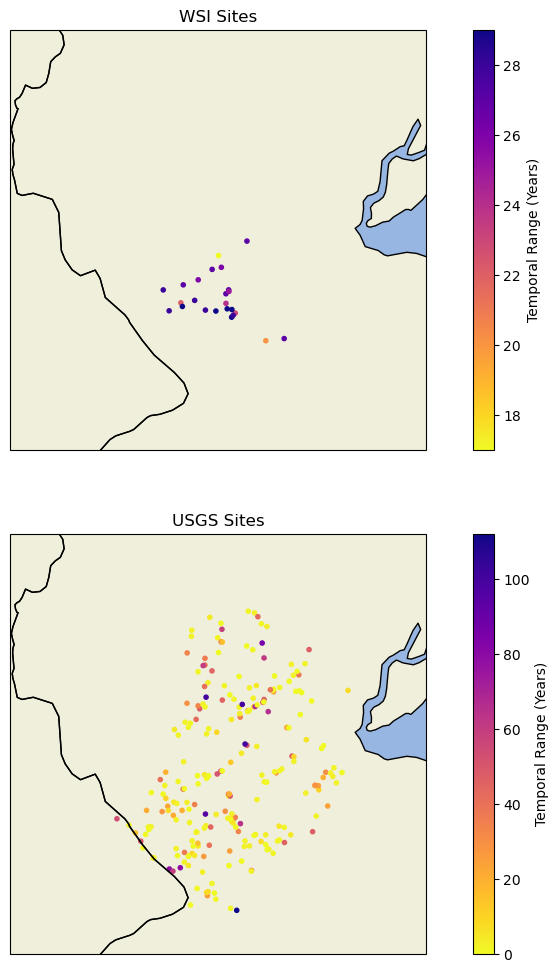

In [10]:
# display spatial range of datasets
# define map extent
extent = [-75.2, -74.1, 40.05, 40.9]

# make basemaps
fig, ax = plt.subplots(nrows = 2,
                       figsize = (12,12),
                       subplot_kw = {'projection':ccrs.UTM(zone = 18)},) # UTM zone 18N is the most accurate conformal projection for New Jersey
for x in ax:
    x.set_extent(extent)
    x.add_feature(cfeature.STATES)
    x.add_feature(cfeature.OCEAN)
    x.add_feature(cfeature.LAND)

# plot wsi data
wsi = ax[0].scatter(x = wsi_sites.Longitude,
              y = wsi_sites.Latitude,
              c = wsi_sites.DateRange,
              cmap = 'plasma_r',
              marker = '.',
              transform = ccrs.PlateCarree())
fig.colorbar(wsi, ax = ax[0], label = 'Temporal Range (Years)')
ax[0].title.set_text('WSI Sites')

# plot usgs data
usgs = ax[1].scatter(x = usgs_sites.dec_long_va,
              y = usgs_sites.dec_lat_va,
              c = usgs_sites.DateRange,
              cmap = 'plasma_r',
              marker = '.',
              transform = ccrs.PlateCarree())
fig.colorbar(usgs, ax = ax[1], label = 'Temporal Range (Years)')
ax[1].title.set_text('USGS Sites')

*NOTE: color bars are scaled differently

Based on the above plots, it is clear that the spatial range of WSI water chemistry sampling sites is smaller than that of USGS, but the temporal range of the WSI sites is more consistent. Many of the USGS sites were sampled for a very short period of time, so the larger dataset may be misleading. If a researcher is looking to assess water chemistry trends across a small watershed, the WSI data is likely a better choice. That said, the USGS data may be more appropriate for examining trends at individual stations over a very long time period (sometimes over 100 years), or taking snapshots of water chemistry across the entire state, but at intervals that are constrained by the availability of data.

## 2. Statistical value

Now, we will compare data from two sampling sites (one from each dataset) that have been testing the water of the same stream during the same time period in order to assess the volume and reliability of each dataset.

#### USGS: Site 01402000

Lat: 40.475

Lon: -74.576

Filename: waterquality_usgs_millstone.csv

Source: https://waterdata.usgs.gov/monitoring-location/01402000/#parameterCode=00065&period=P7D&showMedian=true

#### WSI: Site MR3

Lat: 40.407

Lon: -74.637

Filename: waterquality_wsi_millstone.csv

Source: https://sbmwa.maps.arcgis.com/apps/dashboards/3cec936ab27e4b25b3fa72f00ee36d44

In [11]:
# bring data into pandas dataframes
usgs_ms = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/waterquality_usgs_millstone.csv')
wsi_ms = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/waterquality_wsi_millstone.csv')

# It should be noted that the USGS data includes many more water chemistry parameters than the WSI, and both datasets include more parameters than are contained in these dataframes.

In [12]:
usgs_ms

,SITENO,DATE,WATERTEMP,AIRTEMP,DOMGL,DOPS,PHFIELD,PHLAB,NO3,NN,PO4
0,1402000,8/14/1991,23.5,NaN,9.0,106.0,7.1,7.3,1.59,1.60,0.180
1,1402000,10/29/1991,13.5,NaN,5.9,56.0,7.1,7.0,2.78,2.80,0.840
2,1402000,10/29/1991,NaN,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN
3,1402000,2/5/1992,2.5,NaN,13.0,97.0,7.6,7.6,3.24,3.26,0.190
4,1402000,3/26/1992,7.0,NaN,12.2,100.0,7.5,7.5,1.77,1.78,0.070
...,...,...,...,...,...,...,...,...,...,...,...
186,1402000,9/27/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,1402000,9/27/2022,NaN,NaN,NaN,NaN,NaN,7.7,NaN,4.62,0.856
188,1402000,11/16/2022,NaN,NaN,NaN,NaN,NaN,7.7,NaN,2.20,0.213
189,1402000,3/8/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# wsi dataset uses '99' to indicate NA value, and includes values below, at, or above detection limits with <, =, >.
wsi_ms

,Site,Date,Air Temperature,Water Temperature,Nitrate,NIT_GL,Phosphate,PHOS_GL,pH,PH_GL,Turbidity,TURB_GL,Average Dissolved Oxygen
0,MR3,7/17/1993,22.0,24.0,0.4,=,0.2,<,7.5,=,99,<,5.2
1,MR3,7/31/1993,26.0,26.0,2.4,=,0.2,<,7.0,=,99,<,5.0
2,MR3,8/14/1993,24.0,25.0,2.4,=,0.4,=,7.0,=,99,<,5.8
3,MR3,8/28/1993,30.0,26.0,0.2,=,0.6,=,6.0,=,99,<,4.6
4,MR3,9/11/1993,16.0,22.0,0.8,=,0.2,<,7.0,=,99,>,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,MR3,11/15/2019,9.0,6.0,2.4,=,0.8,=,7.0,=,10,=,9.1
315,MR3,12/22/2019,6.0,2.0,1.6,=,0.4,=,7.0,=,10,=,11.9
316,MR3,1/17/2020,1.0,5.0,2.4,=,0.6,=,7.0,=,10,=,10.2
317,MR3,2/14/2020,0.5,5.5,1.6,=,0.4,=,7.0,=,10,=,10.4


In [14]:
# replace 99 with NA
wsi_ms = wsi_ms.replace(99, np.nan)
wsi_ms

,Site,Date,Air Temperature,Water Temperature,Nitrate,NIT_GL,Phosphate,PHOS_GL,pH,PH_GL,Turbidity,TURB_GL,Average Dissolved Oxygen
0,MR3,7/17/1993,22.0,24.0,0.4,=,0.2,<,7.5,=,NaN,<,5.2
1,MR3,7/31/1993,26.0,26.0,2.4,=,0.2,<,7.0,=,NaN,<,5.0
2,MR3,8/14/1993,24.0,25.0,2.4,=,0.4,=,7.0,=,NaN,<,5.8
3,MR3,8/28/1993,30.0,26.0,0.2,=,0.6,=,6.0,=,NaN,<,4.6
4,MR3,9/11/1993,16.0,22.0,0.8,=,0.2,<,7.0,=,NaN,>,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,MR3,11/15/2019,9.0,6.0,2.4,=,0.8,=,7.0,=,10.0,=,9.1
315,MR3,12/22/2019,6.0,2.0,1.6,=,0.4,=,7.0,=,10.0,=,11.9
316,MR3,1/17/2020,1.0,5.0,2.4,=,0.6,=,7.0,=,10.0,=,10.2
317,MR3,2/14/2020,0.5,5.5,1.6,=,0.4,=,7.0,=,10.0,=,10.4


In [19]:
wsi_ms.loc[wsi_ms.NIT_GL == '<', wsi_ms.Nitrate] = np.NaN

<AxesSubplot:>

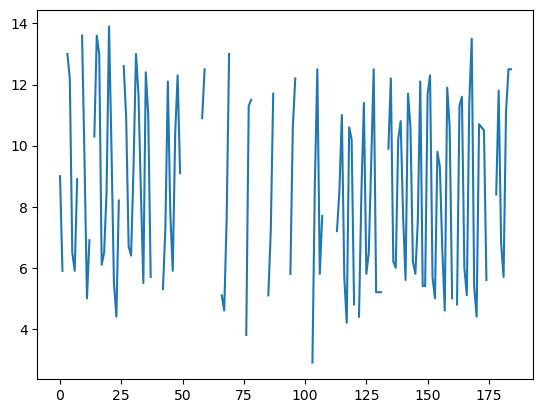

In [15]:
usgs_ms.DOMGL.plot()

<AxesSubplot:>

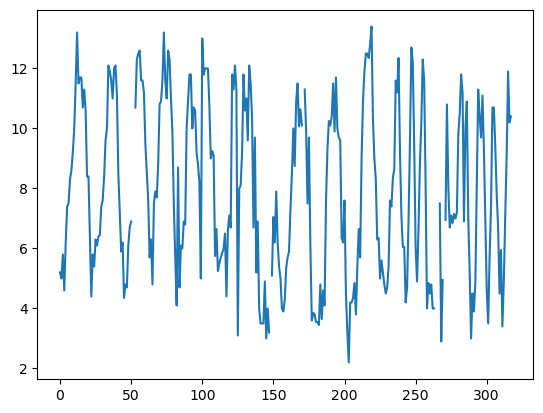

In [16]:
wsi_ms['Average Dissolved Oxygen'].plot()

## 3. Utility